<a href="https://colab.research.google.com/github/SahanaG1999/sahana-chinnu/blob/master/Marketing_Campaign_for_Banking_Products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing the required libraries for EDA



In [ ]:
import pandas as tm
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling (1).xlsx


In [ ]:
import io 
dataframe = tm.read_excel(r'Bank_Personal_Loan_Modelling.xlsx',sheet_name='Data')

In [ ]:
dataframe

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


Top 10 entries

In [ ]:
dataframe.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


bottom 10 entries


In [ ]:
dataframe.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.000000,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.900000,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.500000,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.666667,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.000000,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.900000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.400000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.300000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.500000,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.800000,1,0,0,0,0,1,1


Datatype and non null values

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Displaying the statistics like count,mean,std,min,max

In [ ]:
dataframe.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


number of null values

In [ ]:
dataframe.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

2. Dropping irrelevant columns

In [ ]:
experience = dataframe['Experience']
age = dataframe['Age']
colinnear = experience.corr(age)
colinnear

0.9942148569683321

In [ ]:
dataframe = dataframe.drop(['ID','Experience'],axis=1)
dataframe.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
dataframe.head(10)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
5,37,29,92121,4,0.4,2,155,0,0,0,1,0
6,53,72,91711,2,1.5,2,0,0,0,0,1,0
7,50,22,93943,1,0.3,3,0,0,0,0,0,1
8,35,81,90089,3,0.6,2,104,0,0,0,1,0
9,34,180,93023,1,8.9,3,0,1,0,0,0,0


In [ ]:
dataframe.tail(10)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,55,58,95023,4,2.000000,3,219,0,0,0,0,1
4991,51,92,91330,1,1.900000,2,100,0,0,0,0,1
4992,30,13,90037,4,0.500000,3,0,0,0,0,0,0
4993,45,218,91801,2,6.666667,1,0,0,0,0,1,0
4994,64,75,94588,3,2.000000,3,0,0,0,0,1,0
4995,29,40,92697,1,1.900000,3,0,0,0,0,1,0
4996,30,15,92037,4,0.400000,1,85,0,0,0,1,0
4997,63,24,93023,2,0.300000,3,0,0,0,0,0,0
4998,65,49,90034,3,0.500000,2,0,0,0,0,1,0
4999,28,83,92612,3,0.800000,1,0,0,0,0,1,1


3.Data distribution


EDA


no of unique in each column

In [ ]:
dataframe.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

Nominal Variable

In [ ]:
dataframe.drop('ZIP Code',axis=1)

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,3,0.5,2,0,0,0,0,1,0


Number of people with zero mortgage

In [ ]:
(dataframe.Mortgage ==0).sum()

3462

Number of people with zero credit


In [ ]:
(dataframe.CCAvg==0).sum()

106

Categorial Columns


In [ ]:
dataframe.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
dataframe.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
dataframe["Securities Account"].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
dataframe['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
dataframe.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [ ]:
dataframe['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

univariant analysis

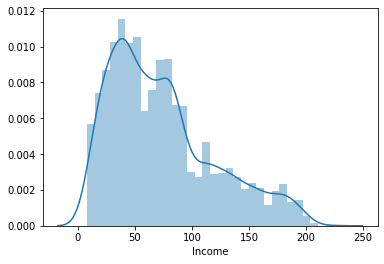

In [ ]:
sns.distplot(dataframe.Income);

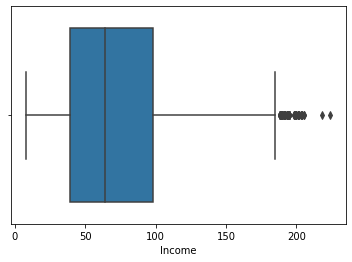

In [ ]:
sns.boxplot(x=dataframe['Income'])

Mortgage


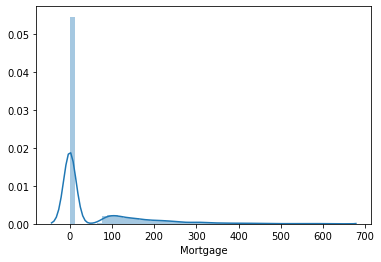

In [ ]:
sns.distplot(dataframe.Mortgage);

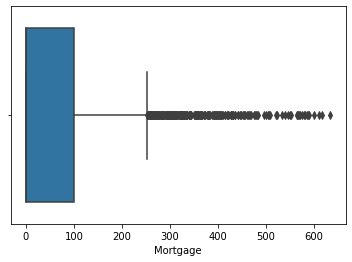

In [ ]:
sns.boxplot(x=dataframe['Mortgage'])

CCAvg

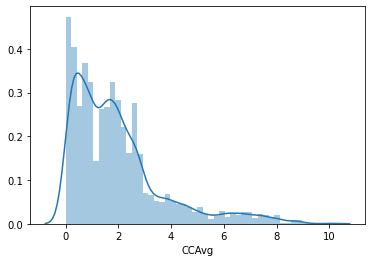

In [ ]:
sns.distplot(dataframe.CCAvg);

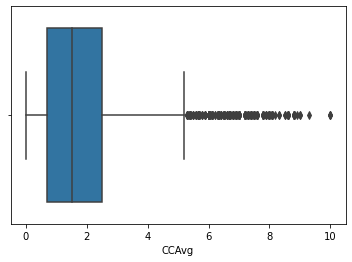

In [ ]:
sns.boxplot(x=dataframe['CCAvg'])

CD Acc

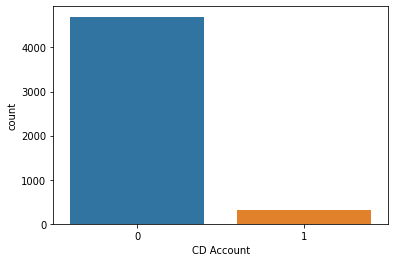

In [ ]:
sns.countplot(x=dataframe['CD Account'])

Education

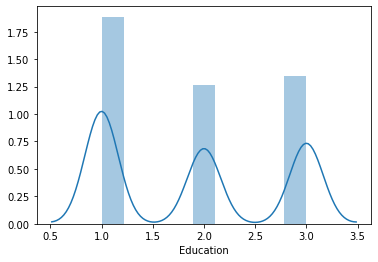

In [ ]:
sns.distplot(dataframe.Education);

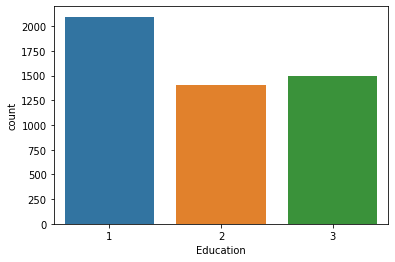

In [ ]:
sns.countplot(dataframe.Education);

Family

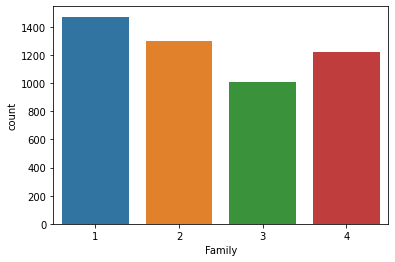

In [ ]:
sns.countplot(dataframe.Family);

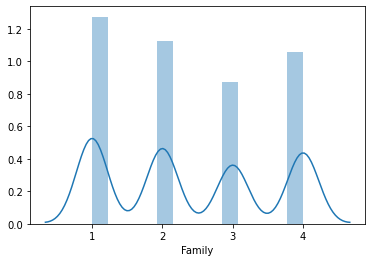

In [ ]:
sns.distplot(dataframe.Family);

BiVariant

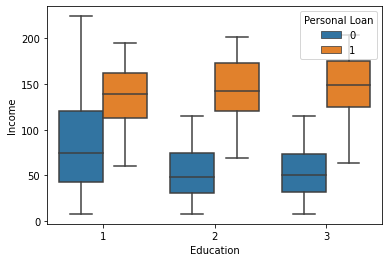

In [ ]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=dataframe);

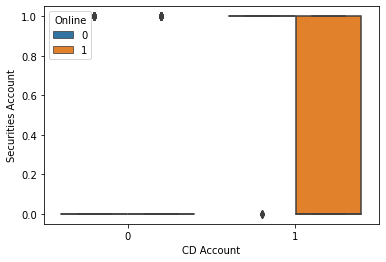

In [ ]:
#it shows all are using internet banking
sns.boxplot(x="CD Account",y="Securities Account",hue="Online",data=dataframe);

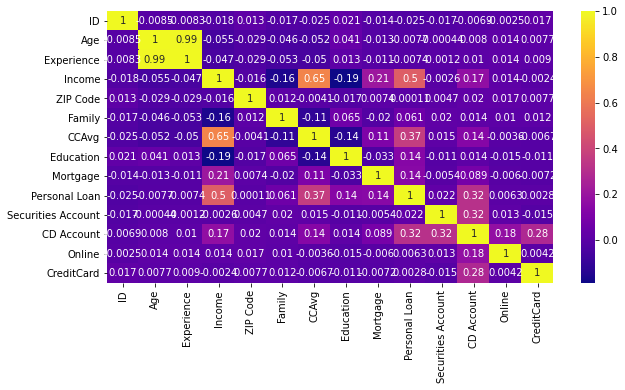

In [ ]:
#using Cmap as Plasma
plt.figure(figsize=(10,5))

sns.heatmap(dataframe.corr(),cmap = "plasma",annot = True);

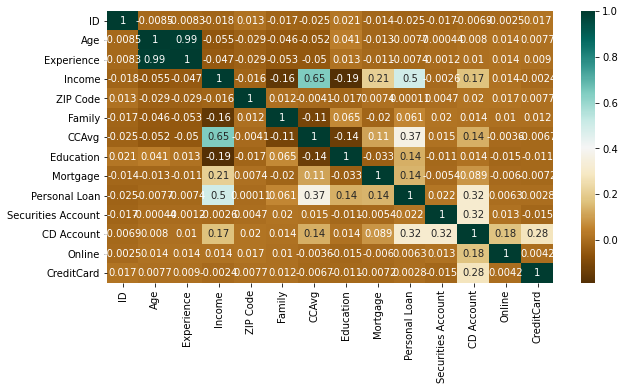

In [ ]:
#uisng cmap as BrBG
plt.figure(figsize=(10,5))

sns.heatmap(dataframe.corr(),cmap="BrBG",annot = True);

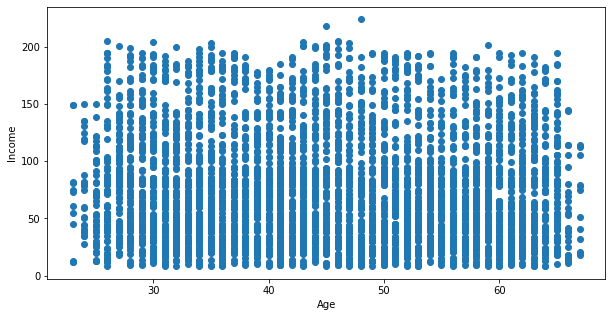

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(dataframe['Age'],dataframe['Income'])
ax.set_xlabel('Age')
ax.set_ylabel('Income')
plt.show()

Text(0.5, 0, 'Age')

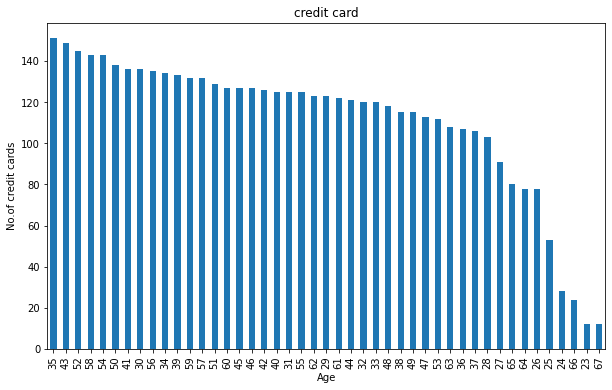

In [ ]:
dataframe['Age'].value_counts().plot.bar(figsize = (10,6))
plt.title("credit card")
plt.ylabel('No.of credit cards')
plt.xlabel('Age')

Text(0.5, 0, 'Securities Account')

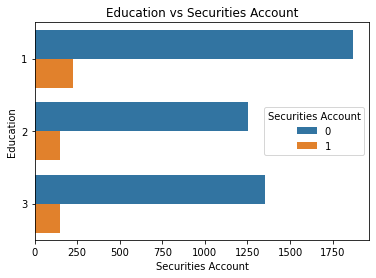

In [ ]:
sns.countplot(y='Education', data = dataframe , hue = 'Securities Account')
plt.title('Education vs Securities Account')
plt.ylabel('Education')
plt.xlabel('Securities Account')

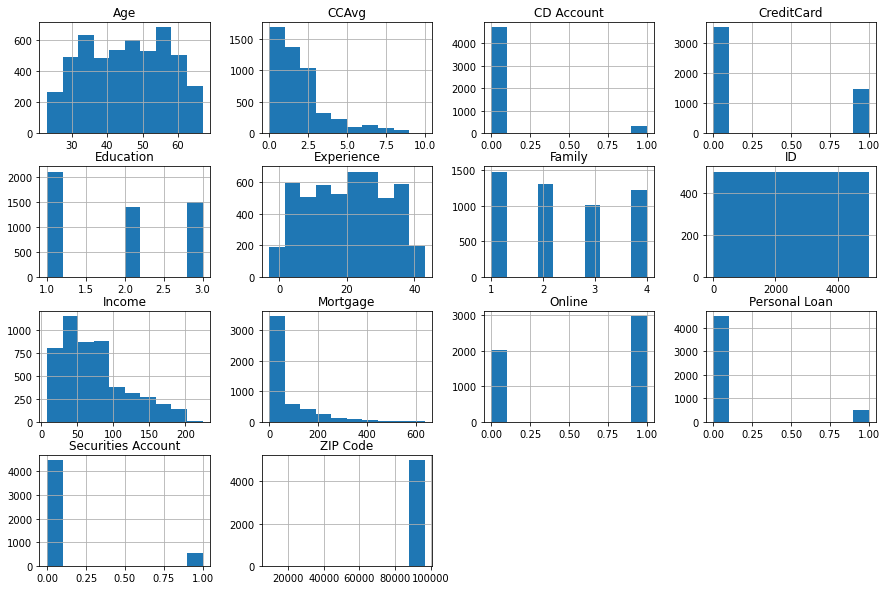

In [ ]:
dataframe.hist(figsize=(15,10));

In [ ]:
Q1 = dataframe.quantile(0.25)
Q3 = dataframe.quantile(0.75)
IQR = Q3-Q1
print(IQR)

ID                    2499.5
Age                     20.0
Experience              20.0
Income                  59.0
ZIP Code              2697.0
Family                   2.0
CCAvg                    1.8
Education                2.0
Mortgage               101.0
Personal Loan            0.0
Securities Account       0.0
CD Account               0.0
Online                   1.0
CreditCard               1.0
dtype: float64


In [ ]:

dataframe = dataframe[~((dataframe < (Q1 - 1.5 * IQR)) | (dataframe > (Q3 + 1.5 * IQR ))).any(axis = 1)]
dataframe.shape



(3645, 12)

Income


In [ ]:
number = dataframe['Income'].value_counts()*100/sum(dataframe['Income'].value_counts())
number

41     2.057613
44     2.030178
38     2.030178
39     1.947874
42     1.920439
         ...   
185    0.054870
153    0.027435
169    0.027435
171    0.027435
164    0.027435
Name: Income, Length: 139, dtype: float64

In [ ]:
labels = number.index[:10]
labels

Int64Index([41, 44, 38, 39, 42, 81, 29, 45, 22, 43], dtype='int64')

In [ ]:
dataframe.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024672,-0.052030,-0.050089,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
x=dataframe.loc[:,dataframe.columns != "Personal Loan"]
y=dataframe[["Personal Loan"]]



In [ ]:
x=dataframe[['Age','Income','CCAvg','Education','Mortgage','Securities Account']]
y=dataframe['Personal Loan'].values


4. Tranformation


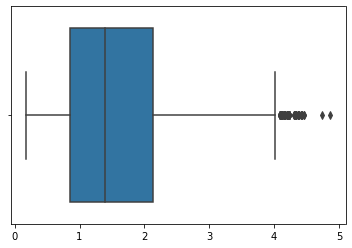

In [ ]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler("box-cox",False)
st.fit(x["Income"].values.reshape(-1,1))
temp=st.transform(x["Income"].values.reshape(-1,1))
sns.boxplot(temp);

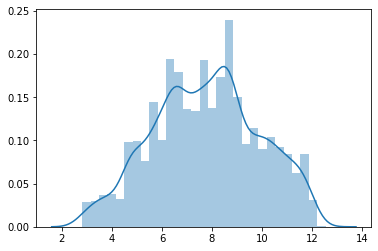

In [ ]:

from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="box-cox",standardize=False)
cols=['Income']
mat=pt.fit_transform(dataframe[cols])
sns.distplot(mat)

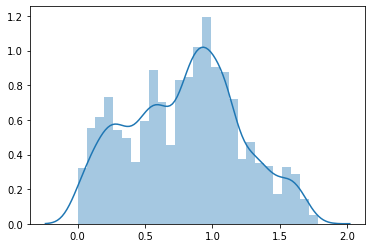

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(x["CCAvg"].values.reshape(-1,1))
temp=pt.transform(x["CCAvg"].values.reshape(-1,1))
sns.distplot(temp);

In [ ]:
dataframe["Mortgage_Int"]=tm.cut(x["Mortgage"],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
dataframe.drop(["Mortgage"],axis=1,inplace=True)


In [ ]:
x.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1


AttributeError: ignored

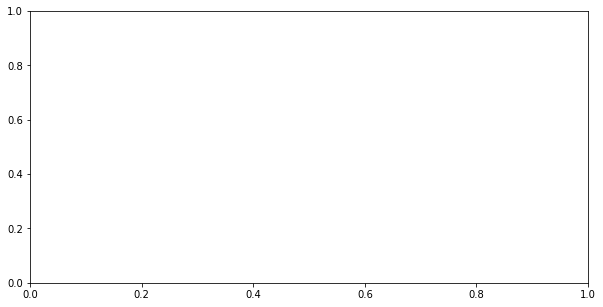

In [ ]:
tempDF=tm.DataFrame(dataframe["Personal Loan"].reset_index())
tempDF.columns=["Label","Personal Loan"]
axl=plt.subplots(figsize=(10,5))
explode=(0,0.15)
axl.pie(tempDF["Personal Loan"],explode=explode,autopct='%1.1f%%',shadow=True,startangle=70)
axl.pie('equal')
plt.title("Personal Loan percentage")
plt.show()

5.Normalize

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3500, 13), (1500, 13), (3500, 1), (1500, 1))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict=model.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
sns.distplot((y_test - y_predict),bins = 50)

ValueError: ignored

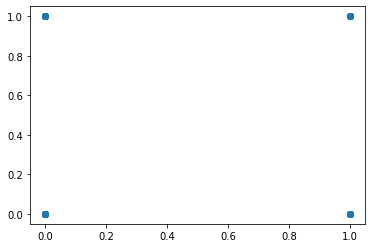

In [ ]:
plt.scatter(y_test,y_predict)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R2 Score', metrics.r2_score(y_test,y_predict))

Mean Absolute Error:  0.05333333333333334
Root Mean Squared Error 0.23094010767585033
R2 Score 0.3166909620991255


In [ ]:
print(metrics.accuracy_score(y_test,y_predict))

0.9466666666666667


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           0       0.96      0.98      0.97      1372\n           1       0.74      0.57      0.65       128\n\n    accuracy                           0.95      1500\n   macro avg       0.85      0.78      0.81      1500\nweighted avg       0.94      0.95      0.94      1500\n'

In [ ]:
metrics.recall_score(y_test,y_predict)

0.5703125

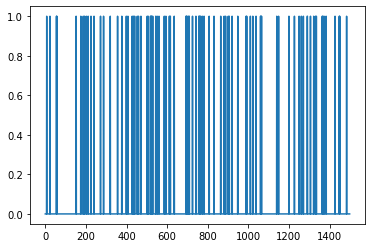

In [ ]:
plt.plot(y_predict)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 40)
x_poly = poly_reg.fit_transform(x_train)
poly_reg.fit(x_poly,y_train)
line_reg2 = LogisticRegression()
line_reg2.fit(x_poly, y_train)

In [ ]:
y_predict = line_reg2.predict(poly_reg.fit_transform(x_test))
plt.scatter(y_test,y_predict)

In [ ]:
sns.distplot((y_test-y_predict),bins = 50)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R2 Score', metrics.r2_score(y_test,y_predict))